In [2]:
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.optimizers import SGD
from keras.datasets import mnist
import tensorflow as tf

import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import os

numpy.random.seed(110)

C:\Users\BRG_user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();


In [6]:

batch_size = 128
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 300
x_test /= 300
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

number_train=60000
number_test=10000

x_train=x_train[0:number_train,:]
x_test=x_test[0:number_test,:]

y_train=y_train[0:number_train]
y_test=y_test[0:number_test]

60000 train samples
10000 test samples


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.0099 - acc: 0.9331 - val_loss: 0.0047 - val_acc: 0.9683
Epoch 2/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0045 - acc: 0.9712 - val_loss: 0.0048 - val_acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.0031 - acc: 0.9801 - val_loss: 0.0037 - val_acc: 0.9779
Epoch 4/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0025 - acc: 0.9843 - val_loss: 0.0038 - val_acc: 0.9758
Epoch 5/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.0023 - acc: 0.9856 - val_loss: 0.0039 - val_acc: 0.9749
73.82684819057005
Test loss: 0.0038849645372763574
Test accuracy: 0.9749


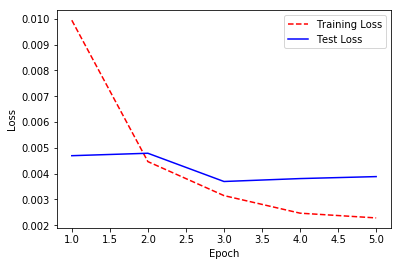

In [7]:
num_classes = 10

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#model.summary()
optimizer =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])
start = timeit.default_timer()
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = timeit.default_timer()
print(end-start)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0255 - acc: 0.9253 - val_loss: 0.0160 - val_acc: 0.9663
Epoch 2/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.0139 - acc: 0.9732 - val_loss: 0.0134 - val_acc: 0.9732
Epoch 3/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.0115 - acc: 0.9811 - val_loss: 0.0115 - val_acc: 0.9767
Epoch 4/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0102 - acc: 0.9851 - val_loss: 0.0116 - val_acc: 0.9787
Epoch 5/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.0093 - acc: 0.9881 - val_loss: 0.0109 - val_acc: 0.9789
53.518833155054494
Test loss: 0.010930846367776394
Test accuracy: 0.9789


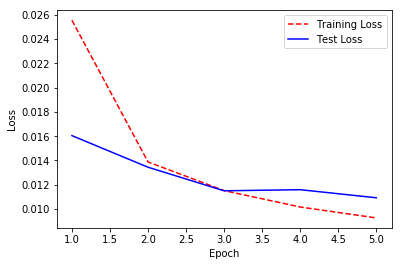

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 25s 421us/step - loss: 0.0211 - acc: 0.9394 - val_loss: 0.0141 - val_acc: 0.9683
Epoch 2/5
60000/60000 [==============================] - 25s 409us/step - loss: 0.0122 - acc: 0.9761 - val_loss: 0.0119 - val_acc: 0.9747
Epoch 3/5
60000/60000 [==============================] - 24s 399us/step - loss: 0.0101 - acc: 0.9834 - val_loss: 0.0108 - val_acc: 0.9788
Epoch 4/5
60000/60000 [==============================] - 24s 402us/step - loss: 0.0089 - acc: 0.9879 - val_loss: 0.0105 - val_acc: 0.9796
Epoch 5/5
60000/60000 [==============================] - 23s 387us/step - loss: 0.0081 - acc: 0.9903 - val_loss: 0.0104 - val_acc: 0.9804
122.55701326875231
Test loss: 0.01038635156750679
Test accuracy: 0.9804


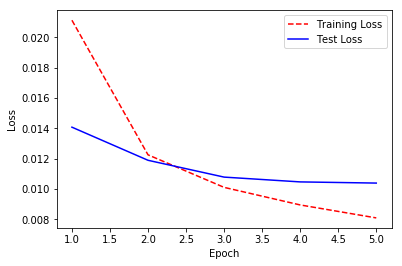

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.0199 - acc: 0.9439 - val_loss: 0.0103 - val_acc: 0.9750
Epoch 2/5
60000/60000 [==============================] - 18s 302us/step - loss: 0.0084 - acc: 0.9820 - val_loss: 0.0082 - val_acc: 0.9797
Epoch 3/5
60000/60000 [==============================] - 18s 305us/step - loss: 0.0072 - acc: 0.9874 - val_loss: 0.0075 - val_acc: 0.9824
Epoch 4/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.0053 - acc: 0.9919 - val_loss: 0.0072 - val_acc: 0.9842
Epoch 5/5
60000/60000 [==============================] - 18s 304us/step - loss: 0.0045 - acc: 0.9946 - val_loss: 0.0064 - val_acc: 0.9847
93.08853587010094
Test loss: 0.006414768375456333
Test accuracy: 0.9847


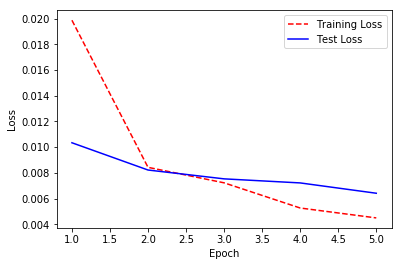